# Matrix Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [3]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA

# 1. Heatmaps
Plot rectangular data as a color-encoded matrix

<AxesSubplot:>

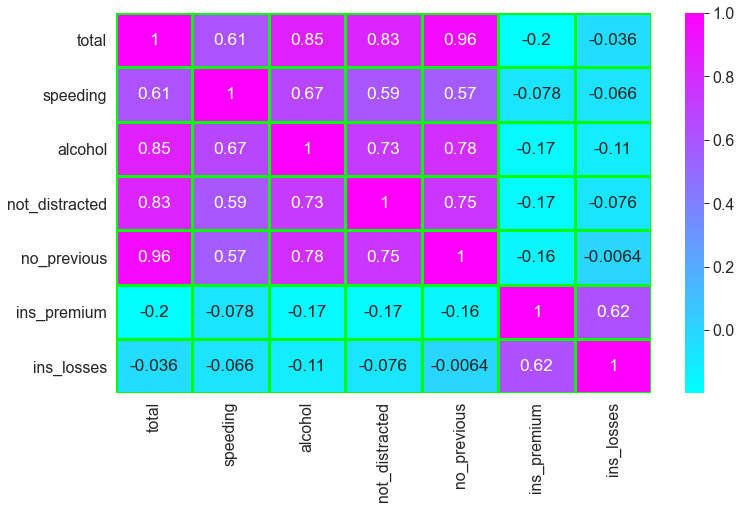

In [26]:
plt.figure(figsize=(12,7))
sns.set_context('paper', font_scale=1.8)
sns.set_style('darkgrid')
#plt.legend(loc=10)

crash_mx = crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='cool', linecolor='lime', linewidths=1.1)

In [6]:
flight_df = sns.load_dataset('flights')
flight_df.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

# 2nd way of looking at heatmap

pivot_table : Create a spreadsheet-style pivot table as a DataFrame

In [7]:
# Initially converting the data into a pivot table and then using the heatmap

flight_df = flight_df.pivot_table(index='month', columns='year', values='passengers')

In [8]:
flight_df

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

<AxesSubplot:xlabel='year', ylabel='month'>

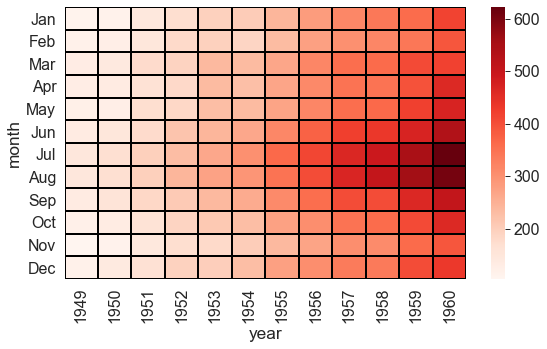

In [30]:
plt.figure(figsize=(9,5)) 

# I can use the linecolor='....' and linewidth='...' to give lines between data points, I must use both
sns.heatmap(flight_df, cmap='Reds', linecolor='black', linewidths=1.9, cbar=True)

# Cluster Map
Plot a matrix dataset as a hierarchically-clustered heatmap.

In [90]:
iris_df = sns.load_dataset('iris')
iris_df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [54]:
species = iris_df['species']
#popped_species = iris_df.pop('species')
iris = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

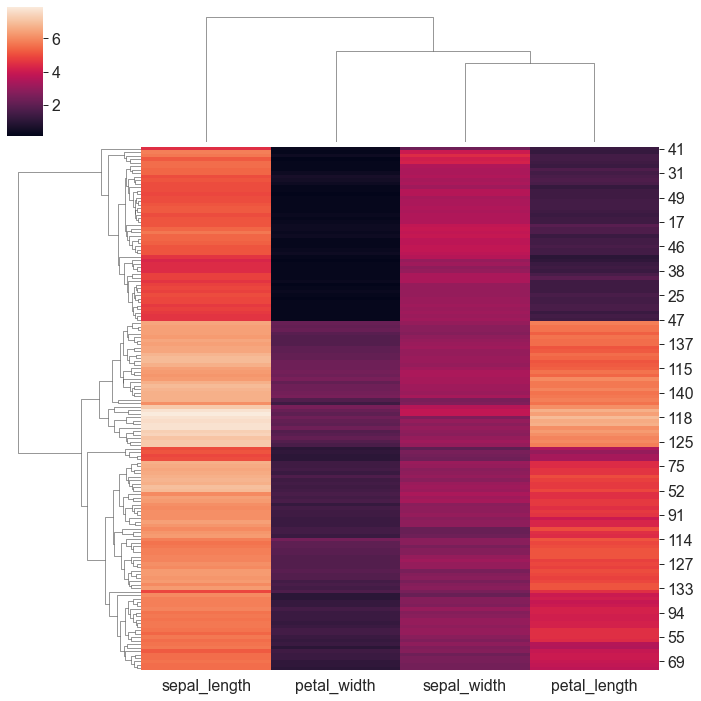

In [55]:
sns.clustermap(iris)

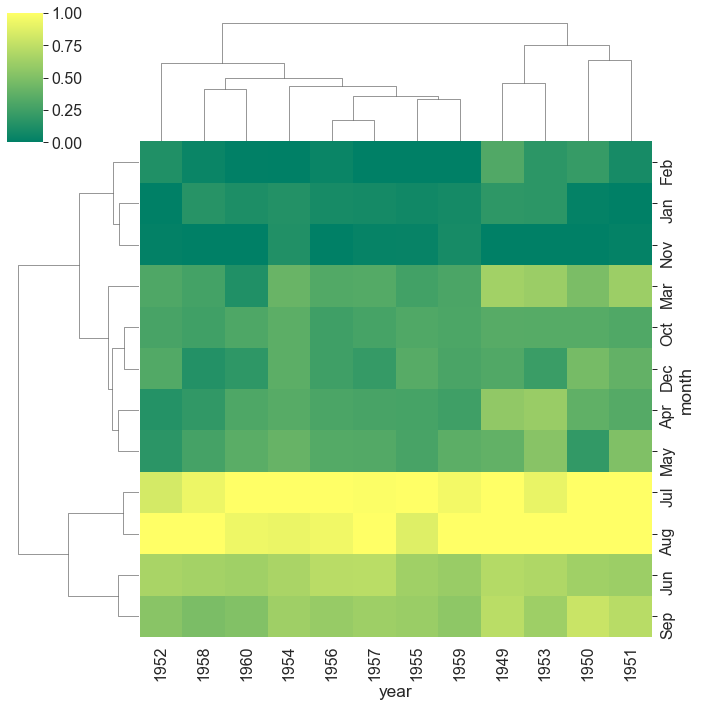

In [58]:
sns.clustermap(flight_df, cmap='summer', standard_scale=1)

# PairGrids
Subplot grid for plotting pairwise relationships in a dataset

- I can use many .maps to customise where the plots will be: 
   - map(everywhere), map_diag (shows diagnal graphs), map_offdiag (removes all diagnal graphs), map_upper (displays the graphs right half), map_lower (displays the graphs left half)
   
- I can use matplotlip (plt) graphs and seaborn (sns) graphs

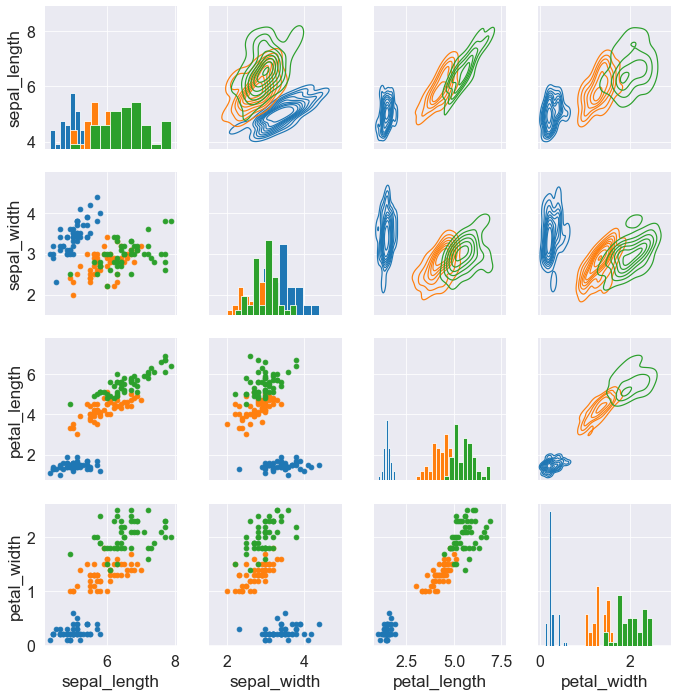

In [87]:
# I will colourise based on the species

iris_g = sns.PairGrid(hue='species', data=iris_df)

# Below I'm adding a scatter plot to
iris_g.map_lower(plt.scatter)

# And in the same chart, I want to plot another graph; e.g. histogram, and diagnally 
iris_g.map_diag(plt.hist)

# I want to use another type of graph on the upper part
iris_g.map_upper(sns.kdeplot)


# Cutome PairGrid

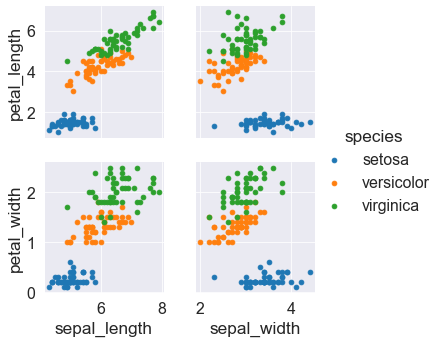

In [93]:
# I can also define variable for my custom grid 
iris_gg = sns.PairGrid(data=iris_df, hue='species',
                      x_vars=['sepal_length','sepal_width'],
                      y_vars=['petal_length', 'petal_width'])

# I need to map it and display the desired plot
iris_gg.map(plt.scatter)

# Adding a legend 
iris_gg.add_legend()

# FacetGrid
Print multiple plots in a grid and I can define my columns and rows

In [100]:
tips_df = sns.load_dataset('tips')
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

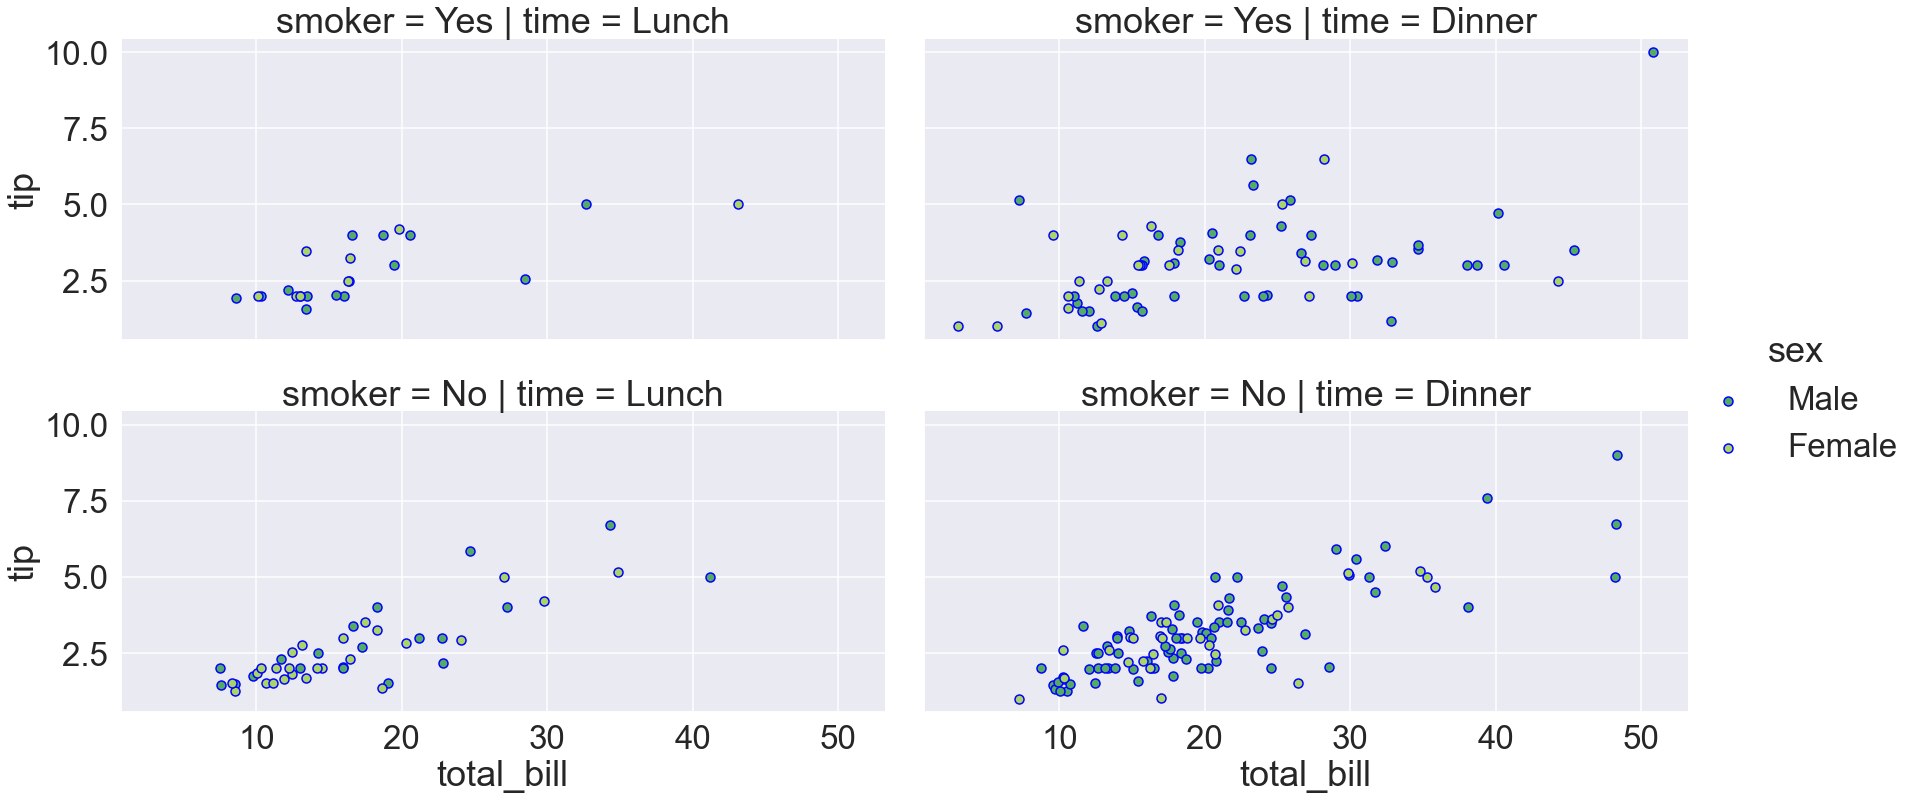

In [152]:
sns.set_context('talk', font_scale=2)
sns.set_style('darkgrid')

tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker', hue='sex', palette='summer', height=6, aspect=2)

# I can also do different plots such as scatter
#tips_fg.map(plt.hist, 'total_bill', bins=7)
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='blue')

tips_fg.add_legend()


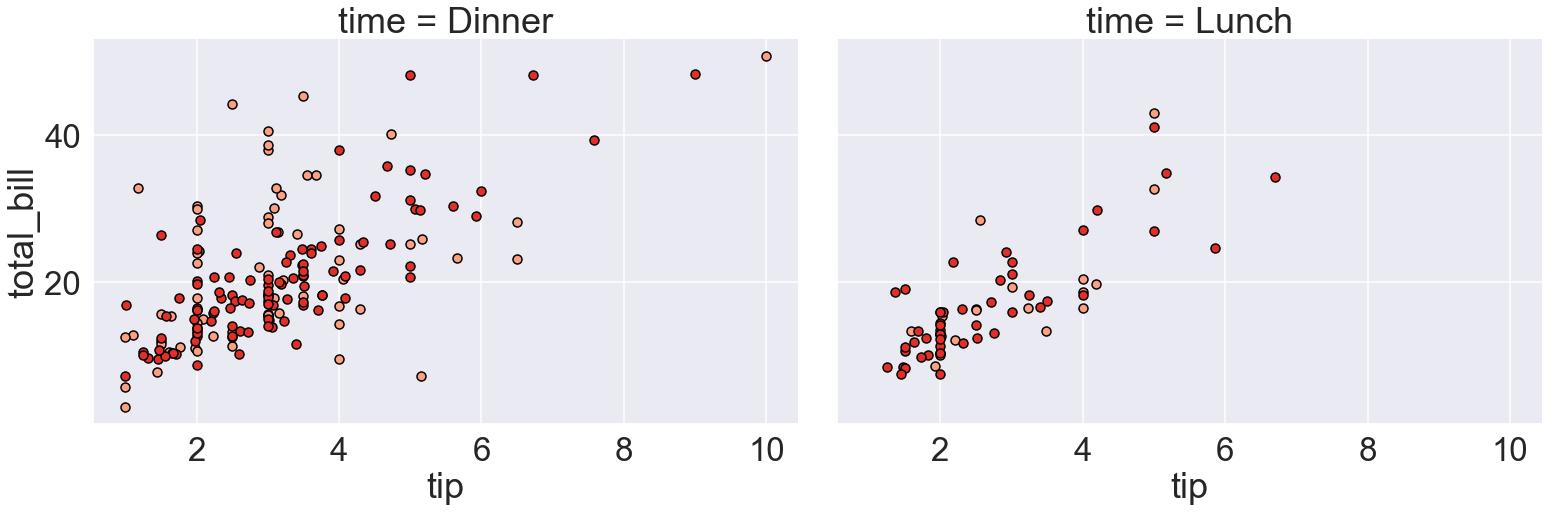

In [150]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', palette='Reds', height=8, aspect=1.4,
                       col_order=['Dinner', 'Lunch'])

tips_fg.map(plt.scatter, 'tip', 'total_bill', edgecolor='black')

#  Regression Plots

In [154]:
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

C:\Users\Morgan Smith\anaconda3\envs\gpu_nb\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 648x648 with 0 Axes>

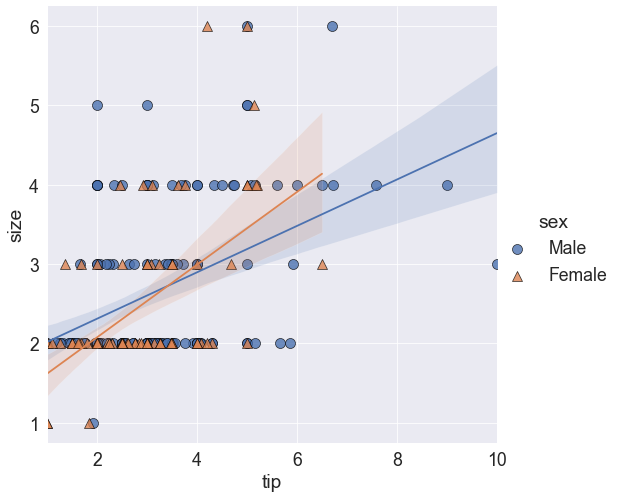

In [177]:
# Put the config of the plot first

plt.figure(figsize=(9,9))
#sns.set_context('paper', font_scale=2)
#sns.set_style('darkgrid')
sns.set_theme(context='paper', palette='deep', font='sans-serif', font_scale=2)

# To display a regression plot, I must use 'implot()'
sns.lmplot(x='tip', y='size', hue='sex', data=tips_df, markers=['o', '^'], legend=True, size=7,
          scatter_kws={'s':100, 'linewidth':0.7, 'edgecolor': 'black'})

In [178]:
titanic_df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]